In [6]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


In [4]:
pip install yfinance

  Obtaining dependency information for yfinance from https://files.pythonhosted.org/packages/1b/0f/77716aa9dd84bb1aa5e93c87122af1de89697b6231f6d01d58d4e7c03c14/yfinance-0.2.36-py2.py3-none-any.whl.metadata
     ---------------------------------------- 0.0/314.6 kB ? eta -:--:--
     ------- ------------------------------- 61.4/314.6 kB 1.1 MB/s eta 0:00:01
     -------------- ----------------------- 122.9/314.6 kB 1.2 MB/s eta 0:00:01
     ------------------- ------------------ 163.8/314.6 kB 1.1 MB/s eta 0:00:01
     --------------------------- ---------- 225.3/314.6 kB 1.3 MB/s eta 0:00:01
     --------------------------- ---------- 225.3/314.6 kB 1.3 MB/s eta 0:00:01
     ------------------------------ ----- 266.2/314.6 kB 962.4 kB/s eta 0:00:01
     ------------------------------------ 314.6/314.6 kB 972.3 kB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting re

In [8]:
# Code snippet for getting historical stock data
def get_stock_data(symbol):
     stock_data - yf.download(symbol, period = "max")
     return stock_data

# Specify stock symbol and date range
stock_symbol = 'AAPL'

# Fetch historical stock data
stock_data = yf.download(stock_symbol, period = "max")
print(stock_data)
                         


[*********************100%%**********************]  1 of 1 completed

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
1980-12-12    0.128348    0.128906    0.128348    0.128348    0.099319   
1980-12-15    0.122210    0.122210    0.121652    0.121652    0.094137   
1980-12-16    0.113281    0.113281    0.112723    0.112723    0.087228   
1980-12-17    0.115513    0.116071    0.115513    0.115513    0.089387   
1980-12-18    0.118862    0.119420    0.118862    0.118862    0.091978   
...                ...         ...         ...         ...         ...   
2024-01-12  186.059998  186.740005  185.190002  185.919998  185.919998   
2024-01-16  182.160004  184.259995  180.929993  183.630005  183.630005   
2024-01-17  181.270004  182.929993  180.300003  182.679993  182.679993   
2024-01-18  186.089996  189.139999  185.830002  188.630005  188.630005   
2024-01-19  189.330002  191.949997  188.820007  191.559998  191.559998   

               Volume  
Date         

In [9]:
# Code snippet for data preprocessing
closing_prices = stock_data['Close'].values.reshape(-1,1)
    
scaler = MinMaxScaler(feature_range =(0,1))
closing_prices_scaled = scaler.fit_transform(closing_prices)

# Define the prepare_data_function
def prepare_data(data, n_steps):
    x,y = [], []
    for i in range(len(data) - n_steps):
        x.append(data[i:(i + n_steps), 0])
        y.append(data[i + n_steps, 0])
        return np.array(x), np.array(y)
    

In [13]:
def create_lstm_model(input_shape):
    """
    Create and compile an LSTM model for time series predictio.
    
    Parameters: 
    - input_shape(tuple): Shape of the input data in the form (time_steps, features),
    
    Returns:
    - model (Sequential): Compiled LSTM model.
    """
    model = Sequential()
    # Add the first LSTM layer with 50 units and return sequences for the next layer
    model.add(LSTM(units = 50, return_sequences = True, input_shape = input_shape))
    
    # Add the second LSTM layer with 50 units
    model.add(LSTM(units = 50))
    
    # Add a Dense layer with 1 unit with 50 units
    model.add(Dense(units =1))
    
    # Compile the model using the Adam optimizer and Mean Squared Error loss
    model.compile(optimizer ='adam', loss = 'mean_squared_error')
    
    return model

In [14]:
# Code snipper for creating and traiing the LSTM model
n_steps = 60

# Prepare the training data using the defined function
X_train, y_train = prepare_data(closing_prices_scaled, n_steps)

# Reshape the input data to fit the LSTM model
X_train = np.reshape(X_train,(X_train.shape[0], X_train.shape[1],1))

# Create an instance of the LSTM model
model = create_lstm_model((X_train.shape[1],1))

# Train the model on the training data
model.fit(X_train, y_train, epochs = 10, batch_size = 32)


Epoch 1/10
1/1 [==============================] - 5s 5s/step - loss: 4.5107e-08
Epoch 2/10
1/1 [==============================] - 0s 37ms/step - loss: 1.6447e-04
Epoch 3/10
1/1 [==============================] - 0s 23ms/step - loss: 7.1268e-06
Epoch 4/10
1/1 [==============================] - 0s 30ms/step - loss: 3.5549e-05
Epoch 5/10
1/1 [==============================] - 0s 34ms/step - loss: 8.3585e-05
Epoch 6/10
1/1 [==============================] - 0s 31ms/step - loss: 6.0740e-05
Epoch 7/10
1/1 [==============================] - 0s 33ms/step - loss: 1.7779e-05
Epoch 8/10
1/1 [==============================] - 0s 26ms/step - loss: 1.3015e-09
Epoch 9/10
1/1 [==============================] - 0s 28ms/step - loss: 1.3878e-05
Epoch 10/10
1/1 [==============================] - 0s 25ms/step - loss: 3.2425e-05


In [23]:
# Code snippet for making predictions and evaluation
train_predictions = model.predict(X_train)
train_predictions = scaler.inverse_transform(train_predictions)
mse = mean_squared_error(closing_prices[n_steps:], train_predictions)
print(f'Mean Squared Error on Training Data: {mse}')

1/1 [==============================] - 0s 51ms/step


ValueError: Found input variables with inconsistent numbers of samples: [10806, 1]

ValueError: x and y must have same first dimension, but have shapes (10806,) and (1, 1)

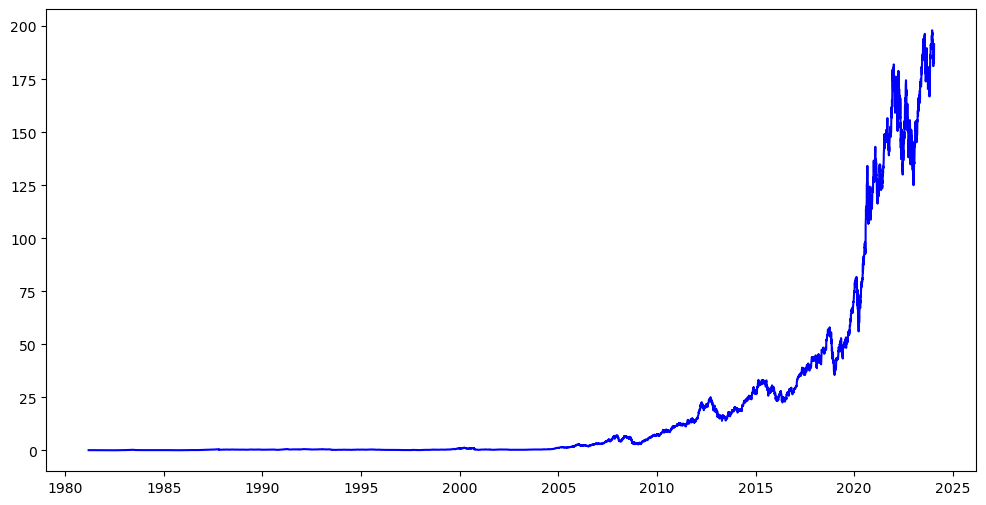

In [21]:
import matplotlib.pyplot as plt
plt.figure(figsize =(12,6))
plt.plot(stock_data.index[n_steps:], closing_prices[n_steps:], label = 'Actual Prices', color = 'blue')
plt.plot(stock_data.index[n_steps:], train_predictions, label = 'Predictions Prices', color = 'red')
plt.title(f'{stock_symbol} Stock Price Prediction using LSTM')
plt.xlabel('Date')
plt.ylabel('Stock Price(USD)')
plt.legend()
plt.show()